In [3]:
import pickle  # for specialised file format called pickle file.
import numpy as np

In [4]:
with open('train_qa.txt', 'rb') as f:
    train_data=pickle.load(f)

In [5]:
print(type(train_data))
print()
print(len(train_data))

<class 'list'>

10000


In [6]:
with open('test_qa.txt', 'rb') as f:
    test_data=pickle.load(f)

In [7]:
print(type(test_data))
print()
print(len(test_data))

<class 'list'>

1000


In [8]:
train_data #--> this is a tuple

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [9]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

join the dataset

In [10]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [11]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [12]:
train_data[0][2]

'no'

Create a  VOCABULARY

In [13]:
all_data = test_data + train_data

In [14]:
len(all_data)

11000

In [15]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In Python a Set is a collection of Unique WOrds

In [16]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [17]:
# Convert Story to a  SET.
vocab = set()
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [18]:
vocab.add('no')

In [19]:
vocab.add('yes')


In [20]:
print(vocab)

{'kitchen', 'Is', 'took', 'office', 'no', 'put', 'down', 'up', 'the', 'garden', 'Sandra', 'back', 'journeyed', 'to', 'milk', 'Daniel', 'moved', 'there', 'bedroom', 'Mary', '.', 'travelled', 'yes', 'left', 'apple', 'grabbed', 'hallway', 'picked', '?', 'John', 'discarded', 'bathroom', 'dropped', 'got', 'in', 'football', 'went'}


In [21]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [22]:
len(vocab)

37

In [23]:
# +1 is done because later we use pad sequence and this will be a place holder.
vocab_len = len(vocab) + 1 

In [24]:
vocab_len 

38

In [25]:
all_data[0][0] # This is a tuple where [0] is story [1] is question [2] answer(yes/no)

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [26]:
# Check the longest story
# since we are checking the story length so we use --> data[0]
all_story_length= [len(data[0]) for data in all_data]

In [27]:
max_story_length= max(all_story_length)

In [28]:
# since we are checking the question length so we use --> data[0]
max_question_length = max([len(data[1]) for data in all_data])

In [29]:
max_question_length

6

# Vectorize the Dataset

In [30]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [33]:
# Create an Integer for Sequence of words.

tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [34]:
tokenizer.word_index

{'kitchen': 1,
 'is': 2,
 'took': 3,
 'office': 4,
 'no': 5,
 'put': 6,
 'down': 7,
 'up': 8,
 'the': 9,
 'garden': 10,
 'sandra': 11,
 'back': 12,
 'journeyed': 13,
 'to': 14,
 'milk': 15,
 'daniel': 16,
 'moved': 17,
 'there': 18,
 'bedroom': 19,
 'mary': 20,
 '.': 21,
 'travelled': 22,
 'yes': 23,
 'left': 24,
 'apple': 25,
 'grabbed': 26,
 'hallway': 27,
 'picked': 28,
 '?': 29,
 'john': 30,
 'discarded': 31,
 'bathroom': 32,
 'dropped': 33,
 'got': 34,
 'in': 35,
 'football': 36,
 'went': 37}

In [35]:
# perform the tokenizing for story, question and answers manually.

train_story_text=[]
train_question_text=[]
train_answer_text=[]


In [36]:
for story,question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answer_text.append(answer)

In [38]:
# here only the stories will be there.
#train_story_text

In [39]:
# here only the question will be there.
#train_question_text

In [40]:
# here only the answer will be there.
#train_answer_text

In [41]:
train_story_seq= tokenizer.texts_to_sequences(train_story_text)

In [42]:
len(train_story_seq)

10000

In [43]:
len(train_story_text)

10000

In [44]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [45]:
train_story_seq

[[20, 17, 14, 9, 32, 21, 11, 13, 14, 9, 19, 21],
 [20,
  17,
  14,
  9,
  32,
  21,
  11,
  13,
  14,
  9,
  19,
  21,
  20,
  37,
  12,
  14,
  9,
  19,
  21,
  16,
  37,
  12,
  14,
  9,
  27,
  21],
 [20,
  17,
  14,
  9,
  32,
  21,
  11,
  13,
  14,
  9,
  19,
  21,
  20,
  37,
  12,
  14,
  9,
  19,
  21,
  16,
  37,
  12,
  14,
  9,
  27,
  21,
  11,
  37,
  14,
  9,
  1,
  21,
  16,
  37,
  12,
  14,
  9,
  32,
  21],
 [20,
  17,
  14,
  9,
  32,
  21,
  11,
  13,
  14,
  9,
  19,
  21,
  20,
  37,
  12,
  14,
  9,
  19,
  21,
  16,
  37,
  12,
  14,
  9,
  27,
  21,
  11,
  37,
  14,
  9,
  1,
  21,
  16,
  37,
  12,
  14,
  9,
  32,
  21,
  16,
  28,
  8,
  9,
  36,
  18,
  21,
  16,
  37,
  14,
  9,
  19,
  21],
 [20,
  17,
  14,
  9,
  32,
  21,
  11,
  13,
  14,
  9,
  19,
  21,
  20,
  37,
  12,
  14,
  9,
  19,
  21,
  16,
  37,
  12,
  14,
  9,
  27,
  21,
  11,
  37,
  14,
  9,
  1,
  21,
  16,
  37,
  12,
  14,
  9,
  32,
  21,
  16,
  28,
  8,
  9,
  36,
  18,
  21,


# Vectorizing using function


'''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''

In [51]:
#default the valiue of word_index to the tokenizer.word_index we created in ln34
#max_story and max_question length should be known because pad sequence is used and not all story and 
#question are of same length.
#take the data containg the story, question and answer.
# vectorize the story, question and answer into padded sequences
#for this loop all the data for every  story, question and answer
#convert raw words tomraw index value.
#append ech word to the outpur list.
#create output list.

def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_length, max_question_len=max_question_length):
    
    #STORY---> X 
    X= []
    
    # QUESTION---> Xq
    Xq =[]
    
    #Y correct answer(yes/no)
    Y =[]
    
    for story,question,answer in data:
        
        #for each story
        # [23,24....]
        
        x= [word_index[word.lower()] for word in story]
        
        xq= [word_index[word.lower()] for word in question]
        
        y= np.zeros(len(word_index)+1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
        #paddins sequences
        return (pad_sequences(X,maxlen=max_story_length),pad_sequences(Xq,maxlen=max_question_length),np.array(Y))

In [52]:
inputs_train, question_train, answer_train = vectorize_stories(train_data)

In [53]:
inputs_test, question_test, answer_test = vectorize_stories(test_data)

In [54]:
inputs_test

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        20, 34,  9, 15, 18, 21, 30, 17, 14,  9, 19, 21]])

In [55]:
inputs_train

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        20, 17, 14,  9, 32, 21, 11, 13, 14,  9, 19, 21]])

In [56]:
answer_train

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [59]:
answer_test

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [57]:
tokenizer.word_index['yes']

23

In [58]:
tokenizer.word_index['no']

5

In [60]:
sum(answer_test)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [61]:
sum(answer_train)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

# CREATING THE MODEL

In [63]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,concatenate,LSTM


In [66]:
# Adding A Placeholder using input
#"Input" is used to instantiate a keras tensor
#PLACEHOLDER shape =(max_story_len, batch_size)---> which is a tuple
input_sequence= Input((max_story_length,))
question = Input((max_question_length,))

In [67]:
# Defing the Vocabulary size---> which shows how many words we have in the vocabulary plus 1 for padding

vocab_size = len(vocab)+1

### Input Encoder M

In [69]:
# Input Encoder M---> which gets embedded in the sequence of vectors

input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# output will be in form of sample, story, max length and embedding dimension

### Input Encoder C

In [74]:
# Input Encoder C---> which gets embedded in the sequence of vectors

input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_length))
input_encoder_c.add(Dropout(0.3))

# output will be in form of samples, story_maxlength and max_question_len

### Input Encoder for Question

In [75]:
# Input Encoder for Question---> which gets embedded in the sequence of vectors

question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64, input_length=max_question_length))
question_encoder.add(Dropout(0.3))

# output will be in form of samples, question_maxlength and embedidng_dim

In [78]:
#  Encoder(input)---> Encoded 

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [82]:
# USE A DOT PRODUCT TO COMPUTE THE MATH BETWEEN THE FIRST INPUT SEQUENCE AND QUESTION
from keras.layers import dot


match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [84]:
# Add the match matrix with second input seq

response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [85]:
answer = concatenate([response,question_encoded])

In [86]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [87]:
print(response)

KerasTensor(type_spec=TensorSpec(shape=(None, 6, 156), dtype=tf.float32, name=None), name='permute/transpose:0', description="created by layer 'permute'")


In [88]:
print(answer)

KerasTensor(type_spec=TensorSpec(shape=(None, 6, 220), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


# Choosing LSTM Model.

In [89]:
answer = LSTM(32)(answer)

In [90]:
# Regulsrization with  Dropout

answer = Dropout(0.5)(answer)
answer  = Dense(vocab_size)(answer)

#OUTPUT---> (Samples, vocab_size), Yes/No

In [91]:
answer= Activation('softmax')(answer)

In [92]:
model = Model([input_sequence,question],answer)

In [111]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [112]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_7 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

In [181]:
history = model.fit([inputs_train,question_train],answer_train,batch_size=20,epochs=120,validation_data=([inputs_train,question_train],answer_train))

Epoch 1/120
1/1 [==============================] - 0s 108ms/step - loss: 1.1610e-04 - accuracy: 1.0000 - val_loss: 2.5698e-04 - val_accuracy: 1.0000
Epoch 2/120
1/1 [==============================] - 0s 41ms/step - loss: 5.8172e-05 - accuracy: 1.0000 - val_loss: 2.5674e-04 - val_accuracy: 1.0000
Epoch 3/120
1/1 [==============================] - 0s 37ms/step - loss: 3.7353e-04 - accuracy: 1.0000 - val_loss: 2.5484e-04 - val_accuracy: 1.0000
Epoch 4/120
1/1 [==============================] - 0s 38ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.4828e-04 - val_accuracy: 1.0000
Epoch 5/120
1/1 [==============================] - 0s 37ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.3982e-04 - val_accuracy: 1.0000
Epoch 6/120
1/1 [==============================] - 0s 56ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 2.3160e-04 - val_accuracy: 1.0000
Epoch 7/120
1/1 [==============================] - 0s 49ms/step - loss: 2.5317e-04 - accuracy: 1.0000 - val_loss: 2.3076e-0

1/1 [==============================] - 0s 44ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 4.5418e-05 - val_accuracy: 1.0000
Epoch 112/120
1/1 [==============================] - 0s 47ms/step - loss: 5.9007e-05 - accuracy: 1.0000 - val_loss: 4.5299e-05 - val_accuracy: 1.0000
Epoch 113/120
1/1 [==============================] - 0s 43ms/step - loss: 1.3649e-04 - accuracy: 1.0000 - val_loss: 4.4702e-05 - val_accuracy: 1.0000
Epoch 114/120
1/1 [==============================] - 0s 42ms/step - loss: 1.1206e-05 - accuracy: 1.0000 - val_loss: 4.4464e-05 - val_accuracy: 1.0000
Epoch 115/120
1/1 [==============================] - 0s 43ms/step - loss: 1.9789e-05 - accuracy: 1.0000 - val_loss: 4.4345e-05 - val_accuracy: 1.0000
Epoch 116/120
1/1 [==============================] - 0s 44ms/step - loss: 3.3480e-04 - accuracy: 1.0000 - val_loss: 4.3153e-05 - val_accuracy: 1.0000
Epoch 117/120
1/1 [==============================] - 0s 45ms/step - loss: 5.6028e-06 - accuracy: 1.0000 - val_loss

### Saving the Model

In [182]:
filename = 'chatbot_100_epochs_tanu.h5'
model.save(filename)

## Evaluating the Model

### Plotting Out Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


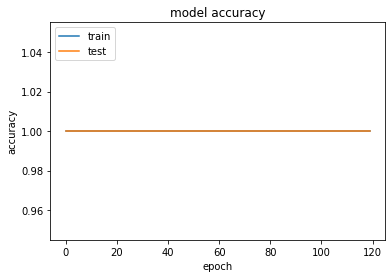

In [183]:
import matplotlib.pyplot as plt
print(history.history.keys()) #->(history.history.keys())--> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating on Given Test Set

In [184]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, question_test]))

In [185]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [186]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [187]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [188]:
test_data[0][2]

'no'

In [189]:
pred_results

array([[1.6005346e-06, 9.3608611e-07, 5.8380897e-07, 1.6780162e-06,
        1.3562268e-06, 9.9995899e-01, 2.6224893e-07, 7.4192587e-07,
        1.2995350e-06, 6.8178713e-07, 1.7451969e-06, 8.6480560e-07,
        1.2800882e-06, 9.5073477e-07, 5.8410524e-07, 2.0731645e-06,
        1.6445972e-06, 5.4577470e-07, 1.9979570e-06, 8.4709745e-07,
        6.2568603e-07, 9.1176230e-07, 1.9039564e-06, 7.8723349e-07,
        3.3468034e-06, 6.3660559e-07, 1.3406320e-06, 7.5850818e-07,
        7.7723502e-07, 1.1054747e-06, 6.4777498e-07, 8.3340950e-07,
        3.7344890e-07, 8.5516245e-07, 1.2976031e-06, 1.1239013e-06,
        6.3495150e-07, 1.4554963e-06]], dtype=float32)

In [190]:
pred_results.shape

(1, 38)

In [191]:
val_max = np.argmax(pred_results[0])

In [192]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [193]:
k

'no'

In [194]:
pred_results[0][val_max] # checking the accuracy.. this is 97%

0.999959

In [195]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

### Creating a Story of OWN

In [196]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [197]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [198]:
my_question = "Is the football in the garden ?"

In [199]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [200]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [201]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

### Vectorise the story, question , answer

In [202]:
my_story, my_question, my_answer = vectorize_stories(mydata)

In [203]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30,
        24,  9,  1, 21, 11, 33,  9, 36, 35,  9, 10, 21]])

In [204]:
my_question

array([[ 9, 36, 35,  9, 10, 29]])

In [205]:
my_answer

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

### Call the model and Predict only story and Question

In [210]:
pred_results = model.predict(([my_story, my_question]))

In [211]:
val_max = np.argmax(pred_results[0])

In [212]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [213]:
k

'no'